ASSIGNMENT-1
# WEB SCRAPING

1) Write a python program to display IMDB’s Top rated 100 Indian movies’ data
https://www.imdb.com/list/ls056092300/ (i.e. name, rating, year ofrelease) and make data frame

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:

url = "https://www.imdb.com/list/ls056092300/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

movies = []
ratings = []
release_years = []

movie_tags = soup.select(".lister-item-content")
for movie in movie_tags:
    name = movie.find('a').get_text()
    rating = movie.find('span', class_='ipl-rating-star__rating').get_text()
    year = movie.find('span', class_='lister-item-year text-muted unbold').get_text().strip('()')
    movies.append(name)
    ratings.append(float(rating))
    release_years.append(year)

movie_data = {
    'Name': movies,
    'Rating': ratings,
    'Year of Release': release_years
}

df = pd.DataFrame(movie_data)
print(df)

                                 Name  Rating Year of Release
0                     Ship of Theseus     8.0            2012
1                              Iruvar     8.4            1997
2                     Kaagaz Ke Phool     7.8            1959
3   Lagaan: Once Upon a Time in India     8.1            2001
4                     Pather Panchali     8.2            1955
..                                ...     ...             ...
95                        Apur Sansar     8.4            1959
96                        Kanchivaram     8.2            2008
97                    Monsoon Wedding     7.3            2001
98                              Black     8.1            2005
99                            Deewaar     8.0            1975

[100 rows x 3 columns]


2) Write a python program to scrape product name, price and discounts from
https://peachmode.com/search?q=bags

In [3]:
url2 = "https://peachmode.com/search?q=bags"
response = requests.get(url2)
soup1 = BeautifulSoup(response.content)
soup1
  

<!DOCTYPE html>
<html class="no-js" dir="ltr" lang="en">
<head>
<!-- Added by AVADA SEO Suite -->
<script>window.FPConfig = {};window.FPConfig.ignoreKeywords=["/cart","/account"]</script>
<script>
const lightJsExclude = [];
</script>
<script>
class LightJsLoader{constructor(e){this.jQs=[],this.listener=this.handleListener.bind(this,e),this.scripts=["default","defer","async"].reduce(((e,t)=>({...e,[t]:[]})),{});const t=this;e.forEach((e=>window.addEventListener(e,t.listener,{passive:!0})))}handleListener(e){const t=this;return e.forEach((e=>window.removeEventListener(e,t.listener))),"complete"===document.readyState?this.handleDOM():document.addEventListener("readystatechange",(e=>{if("complete"===e.target.readyState)return setTimeout(t.handleDOM.bind(t),1)}))}async handleDOM(){this.suspendEvent(),this.suspendJQuery(),this.findScripts(),this.preloadScripts();for(const e of Object.keys(this.scripts))await this.replaceScripts(this.scripts[e]);for(const e of["DOMContentLoaded","readystatech

In [4]:
product_containers = soup.find_all('div', class_='product-item-info')

for container in product_containers:
    product_name = container.find('a', class_='product-item-link').text
    price = container.find('span', class_='price').text
    discount = container.find('span', class_='special-price').text if container.find('span', class_='special-price') else 'No discount'
    print(f'Discount: {discount}')
    print(f'Product Name: {product_name}')
    print(f'Price: {price}')
        
    
        
else:
    print('Failed to retrieve the webpage.')

Failed to retrieve the webpage.


3) Write a python program to scrape cricket rankings from icc-cricket.com. You have to scrape:
a) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.
b) Top 10 ODI Batsmen along with the records of their team and rating.
c) Top 10 ODI bowlers along with the records of their team and rating

In [5]:
response = requests.get('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')
response

<Response [200]>

In [6]:
soup1 = BeautifulSoup(response.content)
soup1

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="image" href="https://www.facebook.com/tr?id=404675685337131&amp;ev=PageView&amp;noscript=1" rel="preload"/><link data-precedence="next" href="/_next/static/css/1db2da7e64599456.css" rel="stylesheet"/><link data-precedence="next" href="/_next/static/css/fe6c80cc29252a3a.css" rel="stylesheet"/><link data-precedence="next" href="/_next/static/css/6b3f2d1b0d08cbb1.css" rel="stylesheet"/><link as="script" fetchpriority="low" href="/_next/static/chunks/webpack-aa576a4c13342f25.js" rel="preload"/><script async="" src="/_next/static/chunks/fd9d1056-0bc148c1e2742227.js"></script><script async="" src="/_next/static/chunks/69-930243032eeb11ea.js"></script><script async="" src="/_next/static/chunks/main-app-4cefd86fb02d4528.js"></script><script async="" src="/_next/static/chunks/749-a4e24144172138ea.js"></script><script async="" src="/_next/static/chunks/956-0

In [7]:
teams = []
matches = []
points = []
ratings = []

table = soup1.find('table', class_='table')

for row in table.find_all('tr')[1:11]:
        team = row.find('span', class_='u-hide-phablet').text.strip()
        match = row.find_all('td')[2].text
        point = row.find_all('td')[3].text
        rating = row.find_all('td')[4].text.strip()

        teams.append(team)
        matches.append(match)
        points.append(point)
        ratings.append(rating)

for i in range(10):
        print(f"{i+1}. {teams[i]} - Matches: {matches[i]}, Points: {points[i]}, Rating: {ratings[i]}")



def scrape_odi_batsmen():
    url = 'https://www.icc-cricket.com/rankings/mens/player-rankings/odi/batting'
    response = requests.get(url)
    soup1 = BeautifulSoup(response.text, 'html.parser')

    players = []
    teams = []
    ratings = []

    table = soup1.find('table', class_='table')

    for row in table.find_all('tr')[1:11]:
        player = row.find('td', class_='table-body__cell name').text.strip()
        team = row.find('span', class_='table-body__logo-text').text.strip()
        rating = row.find('td', class_='table-body__cell u-text-right rating').text.strip()

        players.append(player)
        teams.append(team)
        ratings.append(rating)

    for i in range(10):
        print(f"{i+1}. {players[i]} - Team: {teams[i]}, Rating: {ratings[i]}")



def scrape_odi_bowlers():
    url = 'https://www.icc-cricket.com/rankings/mens/player-rankings/odi/bowling'
    response = requests.get(url)
    soup1 = BeautifulSoup(response.text, 'html.parser')

    players = []
    teams = []
    ratings = []

    table = soup1.find('table', class_='table')

    for row in table.find_all('tr')[1:11]:
        player = row.find('td', class_='table-body__cell name').text.strip()
        team = row.find('span',class_='table-body__logo-text').text.strip()
        rating = row.find('td',class_='table-body__cell u-text-right rating').text.strip()

        players.append(player)
        teams.append(team)
        ratings.append(rating)
    for i in range(10):
            print(f"{i+1}. {players[i]} - Team: {teams[i]}, Rating: {ratings[i]}")



print("Top 10 ODI Teams:")
scrape_odi_teams()
print("\nTop 10 ODI Batsmen:")
scrape_odi_batsmen()
print("\nTop 10 ODI Bowlers:")
scrape_odi_bowlers()

AttributeError: 'NoneType' object has no attribute 'find_all'

4) Write a python program to scrape details of all the posts from https://www.patreon.com/coreyms .Scrape the
heading, date, content and the likes for the video from the link for the youtube video from the post.

In [8]:
response = requests.get('https://www.patreon.com/coreyms')
response

<Response [200]>

In [9]:
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><script type="text/javascript">
            window.patreonConfig = {"apiServer":"www.patreon.com/api","gitSHA":"628b492b5867dfb225a43655c81a6e8860a0afa8","nionDisableDefaultIncludes":true,"formattingLocale":"en-US","eventLoggingPlatform":"Web","isWebView":false,"pathname":"/\u003cstring:campaign_identifier\u003e","is_impersonating":false,"csrfSignature":"tMVguV2YM5GdhzAKPK-A81c8JpBfHh4dk6-wt-1Zbdw"};
          </script><meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/><meta content="Corey Schafer | Patreon" property="twitter:title"/><meta content="Corey Schafer | Patreon" prefix="og: http://ogp.me/ns#" property="og:title"/><meta content="creating Programming Tutorials" property="twitter:description"/><meta content="creating Programming Tutorials" prefix="og: http://ogp.me/ns#" property="og:description"/><link href="https://www.patreon.com/coreyms" rel="canonical"/><meta content="https://www.patr

In [10]:
posts = soup.find_all('div',class_='post')

for post in posts:
    heading = post.find('h4',class_='posts__title__3n4I0').text.strip()
    date = post.find('time',class_= "post__time__2FSqp").text
    content = post.find('div',class_='post__content___2E3VS').text.strip()
    
    youtube_link = post.find('a', href=True, text='YouTube').get('href')
    response_youtube = requests.get(youtube_link)
    soup_youtube = BeautifulSoup(response_youtube.content, 'html.parser')
    likes = soup_youtube.find('div', class_='like-button-renderer').text.strip()
    
    print(f"Heading: {heading}\nDate: {date}\nContent: {content}\nLikes: {likes}\n")
    

5) Write a python program to scrape house details from mentioned URL. It should include house title, location,
area, EMI and price from https://www.nobroker.in/ .Enter three localities which are Indira Nagar, Jayanagar,
Rajaji Nagar.

In [11]:
page1 = requests.get("https://www.nobroker.in/")
page1

<Response [200]>

<!DOCTYPE html>
<html lang="en"><head>
<meta content="794951570520699" property="fb:pages"/>
<link href="https://www.nobroker.in" rel="canonical"/>
<link href="//www.googletagmanager.com" rel="dns-prefetch preconnect"/>
<link href="//www.google-analytics.com" rel="dns-prefetch preconnect"/>
<link href="//assets.nobroker.in" rel="dns-prefetch"/>
<link href="//images.nobroker.in" rel="dns-prefetch"/>
<link href="https://assets.adobedtm.com" rel="dns-prefetch preconnect"/>
<link href="//assets.nobroker.in/static/img/favicon.png" id="favicon" rel="shortcut icon"/>
<link href="https://images.nobroker.in/static/img/fav64.png" rel="apple-touch-icon"/>
<link href="https://hs.nobroker.in" rel="dns-prefetch preconnect"/>
<!--<meta charset="utf-8"/>-->
<meta charset="utf-8"/>
<meta content="app-id=com.nobroker.app&amp;referrer=utm_source%3Dnobroker%26utm_medium%3DmobileWeb" name="google-play-app"/>
<meta content="app-id=1200507100, app-argument=nobrokerapp://" name="apple-itunes-app"/>
<meta cont
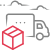
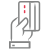
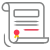
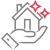
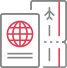
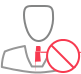
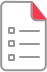
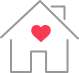
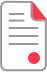
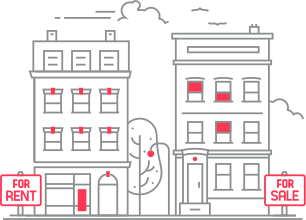

In [12]:
soup2 = BeautifulSoup(page1.content)
soup2

In [22]:
houses = soup2.find('div',{'class':'houses'})

for house in houses:
    title = house.find('h2',{'class':'heading'}).text.strip()
    location = house.find('span',{'class':"location"}).text.strip()
    area = house.find('span',{'class':"area"}).text.strip()
    emi = house.find('span',{'class':"emi"}).text.strip()
    price = house.find('span',{'class':'price'}).text.strip()
    
    details = [title,location,area,emi,price]
    print(details)   

TypeError: 'NoneType' object is not iterable

6) Write a python program to scrape first 10 product details which include product name , price , Image URL from
https://www.bewakoof.com/bestseller?sort=popular 

In [25]:
page3 = requests.get(' https://www.bewakoof.com/bestseller?sort=popular')
page3

<Response [200]>

In [28]:
soup4 = BeautifulSoup(page3.content)
soup4

<!DOCTYPE html>
<html><head>
<meta content="4d8KRpUCzf-ghquF_HLNphibw_xRvUS3kAvzpnF2KlA" name="google-site-verification"/>
<meta content="-TTsyPFCOB4bQlMHawiO4oZGcGX9pxqenB_NZNhhhgA" name="google-site-verification"/>
<meta content="wQa0CQvt7fd2VIoa9qhkevhvwuBvhRwiaB3hVizI9OY" name="google-site-verification"/>
<meta content="o7KS3-fVt15m4Cc1HeYh5HIpv532A4FvvYQzIf-LnsQ" name="google-site-verification"/>
<link href="https://images.bewakoof.com" rel="preconnect"/>
<link href="https://images.bewakoof.com" rel="dns-prefetch"/>
<link href="https://static.bewakoof.com" rel="preconnect"/>
<link href="https://static.bewakoof.com" rel="dns-prefetch"/>
<link href="https://cdn.polyfill.io" rel="preconnect"/>
<link href="https://cdn.polyfill.io" rel="dns-prefetch"/>
<link href="https//www.googletagmanager.com" rel="preconnect"/>
<link href="https//www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<link href="https://connect.facebook.net

In [29]:
product_deatils = []
for product in products:
    name = product.find('h2',{'class':'product-name'}).text.strip()
    price = product.find('span',{'class':'price'}).text.strip()
    image_url = product.find('img',{'class':'product-image'}).get('src')
    product_details.append({'name':name,'price':price,'image_url':image_url})

df = pd.DataFrame(product_details)
print(df.head())

Empty DataFrame
Columns: []
Index: []
